Ian Van Dusen
Lab 4 - Gridded data in Python



In [2]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

In [3]:
# Define filepath
filepath = '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B7.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/rgb.tif']


In [4]:
# Open a single band
src = rasterio.open(files[0])
band_1 = src.read(1)

In [5]:
# Find metadata (e.g. driver, data type, coordinate reference system, transform etc.)
print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1208, 'height': 1422, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(30.0, 0.0, 391695.0,
       0.0, -30.0, 4880565.0), 'tiled': False, 'interleave': 'band'}


In [6]:
# Find coordinate reference system
src.crs # https://epsg.io/32610

CRS.from_epsg(32610)

In [7]:
# Find format
src.driver

'GTiff'

In [8]:
# Find pixel size
src.transform[0]

30.0

In [9]:
# Find bounds of dataset
src.bounds

BoundingBox(left=391695.0, bottom=4837905.0, right=427935.0, top=4880565.0)

In [10]:
# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(full_extent)

[391695.0, 427935.0, 4837905.0, 4880565.0]


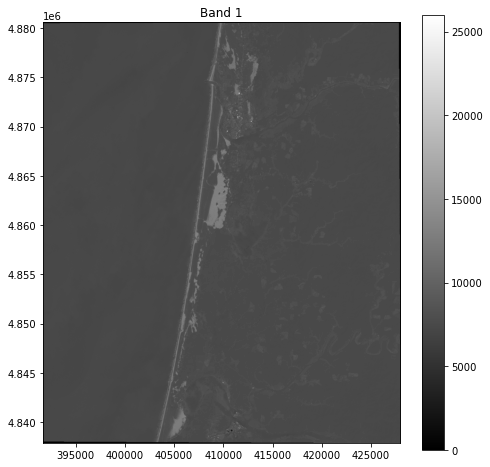

In [11]:
# Plot dataset
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(band_1, cmap='gray', extent=full_extent)
ax.set_title("Band 1")
fig.colorbar(im, orientation='vertical')
plt.show()

In [12]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')

In [13]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 233, latitude: 99, time: 1464)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-05 17:55:44 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [14]:
xds_daily = xds.resample(time='1D').mean()
xds_daily

<xarray.Dataset>
Dimensions:    (time: 366, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 280.6 281.4 ... 296.3 296.2
    tcc        (time, latitude, longitude) float32 0.9765 0.8814 ... 0.2124

***********
## Question 1 (10 points): 

Now that we have gone through some examples in the lecture and lab we are ready to apply some of these methods ourselves. Start by making a **new** `jupyter notebook` called `lab4_submission.ipynb` and complete the following tasks. 

Find the following numbers in the climate reanalysis dataset:

* a) the air temperature (in F) **and** cloud cover (in %) in Florence, OR (in 2020) on **January 31, 2020**?
* b) the air temperature (in F) **and** cloud cover (in %) in **Eugene, OR** (in 2020) on **February 15, 2020**?

You can use the following table to convert from a **date** to a **day-of-year**: https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html

In [15]:
# find the index of the grid point nearest a specific lat/lon.   
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')
fahrenheit = (florence_weather['t2m'][31].values - 273.15) * 9/5 + 32


In [16]:
# Note: Jan 31 is DOY 31
print('Question 1a')
print('Cloud cover in Florence on Jan 31, 2020 = %.2f %%' % (florence_weather['tcc'][31].values * 100))
print('Air temperature in Florence on Jan 31, 2020 = %.2f F' % (fahrenheit))

Question 1a
Cloud cover in Florence on Jan 31, 2020 = 99.88 %
Air temperature in Florence on Jan 31, 2020 = 54.04 F


In [17]:
# find the index of the grid point nearest a specific lat/lon.   
eugene_weather = xds_daily.sel(latitude=44.0521, longitude=-123.0868, method='nearest')
fahrenheit2 = (eugene_weather['t2m'][46].values - 273.15) * 9/5 + 32

In [18]:
# Note: Jan 15 is DOY 46
print('Question 1b')
print('Cloud cover in Eugene on Feb 15, 2020 = %.2f %%' % (eugene_weather['tcc'][46].values * 100))
print('Air temperature in Eugene on Feb 15, 2020 = %.2f F' % (fahrenheit2))

Question 1b
Cloud cover in Eugene on Feb 15, 2020 = 97.51 %
Air temperature in Eugene on Feb 15, 2020 = 43.79 F


*******
## Question 2 (20 points):

Find the following grid cells in the climate reanalysis dataset and provide a rough location of where they are located. 

#### a) Highest average air temperature (i.e. hottest place)

In [19]:
xds_yearly = xds.resample(time='1Y').mean()
xds_yearly

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 282.0 282.7 ... 298.6 298.6
    tcc        (time, latitude, longitude) float32 0.7715 0.7246 ... 0.4797

In [20]:
max_mean_value =  xds_yearly['t2m'][0,:,:].argmax()
print(max_mean_value)

<xarray.DataArray 't2m' ()>
array(18928)
Coordinates:
    time     datetime64[ns] 2020-12-31


In [26]:
# Convert 1D index to 2D coordinates
high_idx = np.unravel_index(max_mean_value, xds['t2m'][0,:,:].shape)
print(high_idx)

(81, 55)


In [27]:
warm = xds_yearly['t2m'][0, high_idx[0], high_idx[1]].values
print('Warmest place on Earth was %.2f F' % ((warm - 273.15) * 9/5 + 32))

Warmest place on Earth was 79.07 F


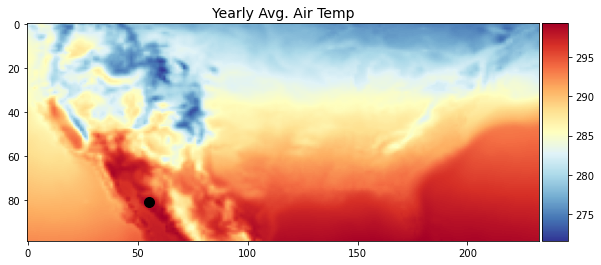

In [29]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Yearly Avg. Air Temp", fontsize=14)
ax1.scatter(high_idx[1], high_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The warmest place in the data was 79.07 F in Western Mexico.

#### b) Lowest average air temperature (i.e. coldest place)

In [30]:
min_mean_value =  xds_yearly['t2m'][0,:,:].argmin()
print(min_mean_value)

<xarray.DataArray 't2m' ()>
array(4954)
Coordinates:
    time     datetime64[ns] 2020-12-31


In [31]:
# Convert 1D index to 2D coordinates
low_idx = np.unravel_index(min_mean_value, xds['t2m'][0,:,:].shape)
print(low_idx)

(21, 61)


In [33]:
cold = xds_yearly['t2m'][0, low_idx[0], low_idx[1]].values
print('Cold place on Earth was %.2f F' % ((cold - 273.15) * 9/5 + 32))

Cold place on Earth was 29.18 F


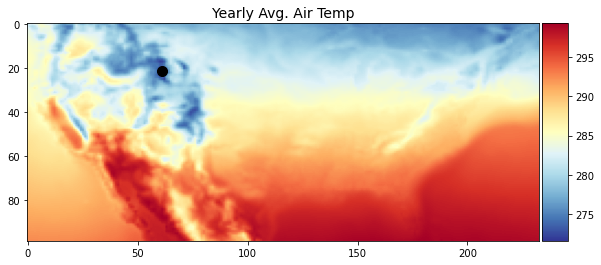

In [35]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Yearly Avg. Air Temp", fontsize=14)
ax1.scatter(low_idx[1], low_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The coldest air temp looks to be in the Northern Rockies.. Maybe near Bozeman??

#### c) Highest average cloudiness (i.e. cloudiest place)

In [36]:
max_clouds_mean_value =  xds_yearly['tcc'][0,:,:].argmax()
print(max_clouds_mean_value)

<xarray.DataArray 'tcc' ()>
array(0)
Coordinates:
    time     datetime64[ns] 2020-12-31


In [37]:
# Convert 1D index to 2D coordinates
high_clouds_idx = np.unravel_index(max_clouds_mean_value, xds['tcc'][0,:,:].shape)
print(high_clouds_idx)

(0, 0)


In [38]:
cloudy = xds_yearly['tcc'][0, high_clouds_idx[0], high_clouds_idx[1]].values
print('Cloudiest place was = %.2f %%' % (cloudy * 100))

Cloudiest place was = 77.15 %


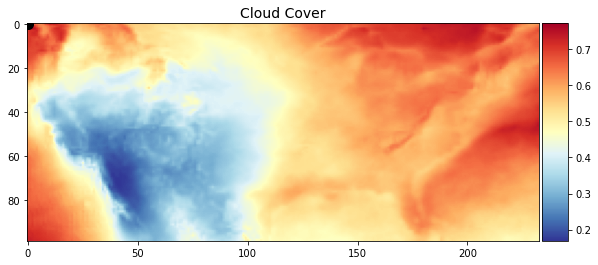

In [40]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['tcc'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Cloud Cover", fontsize=14)
ax1.scatter(high_clouds_idx[1], high_clouds_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

#### d) Lowest average cloudiest (i.e. least cloudy place)


In [41]:
min_clouds_mean_value =  xds_yearly['tcc'][0,:,:].argmin()
print(min_clouds_mean_value)

<xarray.DataArray 'tcc' ()>
array(16584)
Coordinates:
    time     datetime64[ns] 2020-12-31


In [42]:
# Convert 1D index to 2D coordinates
low_clouds_idx = np.unravel_index(min_clouds_mean_value, xds['tcc'][0,:,:].shape)
print(low_clouds_idx)

(71, 41)


In [43]:
clear = xds_yearly['tcc'][0, low_clouds_idx[0], low_clouds_idx[1]].values
print('clearest place was = %.2f %%' % (clear * 100))

clearest place was = 16.89 %


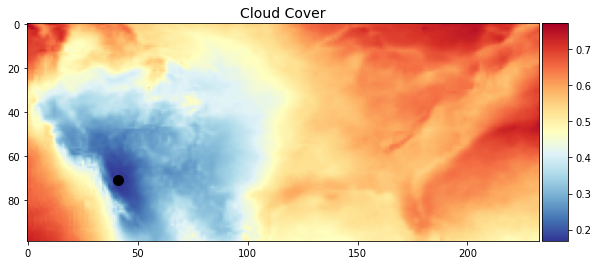

In [44]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['tcc'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Cloud Cover", fontsize=14)
ax1.scatter(low_clouds_idx[1], low_clouds_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The least cloudy place never had any clouds in the Eastern Sierra Desert..

#### e) Place with highest range in air temperature


In [61]:
xds_daily_max = xds.resample(time='1Y').max() 
xds_daily_max

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 302.2 301.0 ... 302.4 302.6
    tcc        (time, latitude, longitude) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0

In [62]:
xds_daily_min = xds.resample(time='1Y').min() 
xds_daily_min

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 268.8 268.9 ... 293.3 293.3
    tcc        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [63]:
xds_daily_range = xds_daily_max - xds_daily_min
xds_daily_range

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 33.49 32.14 ... 9.113 9.284
    tcc        (time, latitude, longitude) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0

In [65]:
max_range =  xds_daily_range['t2m'][0,:,:].argmax()
print(max_range)

<xarray.DataArray 't2m' ()>
array(80)
Coordinates:
    time     datetime64[ns] 2020-12-31


In [66]:
min_range =  xds_daily_range['t2m'][0,:,:].argmin()
print(min_range)

<xarray.DataArray 't2m' ()>
array(21437)
Coordinates:
    time     datetime64[ns] 2020-12-31


In [67]:
# Convert 1D index to 2D coordinates
max_range_idx = np.unravel_index(max_range, xds['t2m'][0,:,:].shape)
print(max_range_idx)

(0, 80)


In [68]:
# Convert 1D index to 2D coordinates
min_range_idx = np.unravel_index(min_range, xds['t2m'][0,:,:].shape)
print(min_range_idx)

(92, 1)


In [75]:
max_range_temp = xds_daily_range['t2m'][0, max_range_idx[0], max_range_idx[1]].values
print('Largest range in map %.2f K' % ((max_range_temp)))

Largest range in map 70.80 K


In [76]:
min_range_temp = xds_daily_range['t2m'][0, min_range_idx[0], min_range_idx[1]].values
print('Smallest range in map %.2f K' % ((min_range_temp )))

Largest range in map 8.84 F


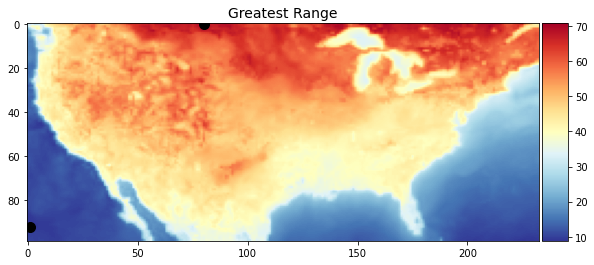

In [79]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_daily_range['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Greatest Range", fontsize=14)
ax1.scatter(max_range_idx[1], max_range_idx[0], s=100, color='k')
ax1.scatter(min_range_idx[1], min_range_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The greatst range appears to be in the High plains of Montana. This makes sense with hot hot days and cold cold nights in the winter.. The least range was well over the ocean which makes sense becasue water does not vary as much 

#### f) Place with the absolute coldest temperature on a single day 


In [85]:
# .argmin() returns the indices of the minimum values of an array
min_value = xds_daily_min['t2m'][0,:,:].argmin()
print(min_value)

<xarray.DataArray 't2m' ()>
array(163)
Coordinates:
    time     datetime64[ns] 2020-12-31


In [86]:
# Convert 1D index to 2D coordinates
low_idx = np.unravel_index(min_value, xds_daily_min['t2m'][0,:,:].shape)
print(low_idx)

(0, 163)


In [88]:
cold = xds_daily_min['t2m'][0, low_idx[0], low_idx[1]].values
print('Coldest temp in sample was %.2f F' % ((cold - 273.15) * 9/5 + 32))

Coldest temp in sample was -34.91 F


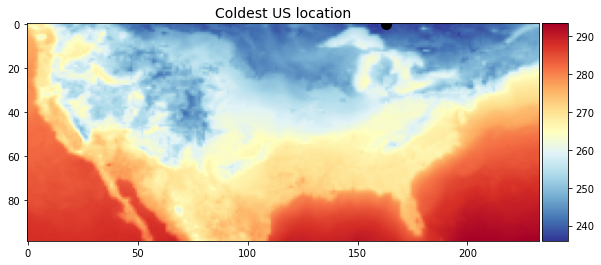

In [89]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_daily_min['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Coldest US location", fontsize=14)
ax1.scatter(low_idx[1], low_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The coldest air temperature was in way Canada way near the great lakes! This makes sense... And sounds cold! But not nearly as cold as Siberia

### Question 3 (20 points):
#### Display the Landsat image of Florence, OR as:


#### a) an NDVI image (i.e. (Band 5 - Band 4) / (Band 5 + Band 4))


In [90]:
# Define filepath
filepath = '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B7.tif', '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab4/lab4/landsat/rgb.tif']


In [91]:
# Open a single band
src = rasterio.open(files[0])
band_1 = src.read(1)

In [92]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

In [93]:
all_bands.shape

(1422, 1208, 8)

In [94]:
# Convert values to a range of 0-255
all_bands_image = np.uint8((all_bands / 65536) * 255)

In [95]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndvi = np.divide((all_bands[:,:,5].astype(float) - all_bands[:,:,4].astype(float)), \
                 (all_bands[:,:,5].astype(float) + all_bands[:,:,4].astype(float)))

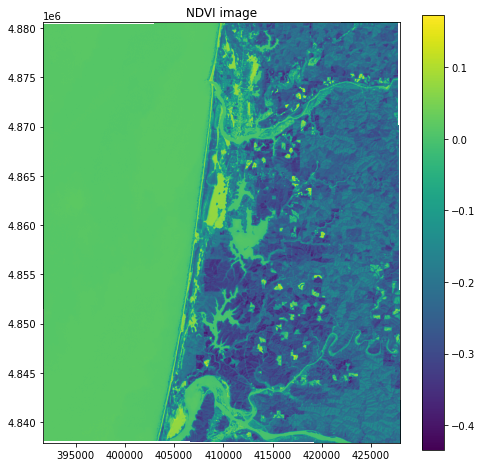

In [96]:
# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()

#### b) a color infrared composite (i.e. bands 5, 4, 3)


In [97]:
# Produce a new array by stacking the RGB bands
infrared = np.dstack((all_bands_image[:,:,5],all_bands_image[:,:,4],all_bands_image[:,:,3]))

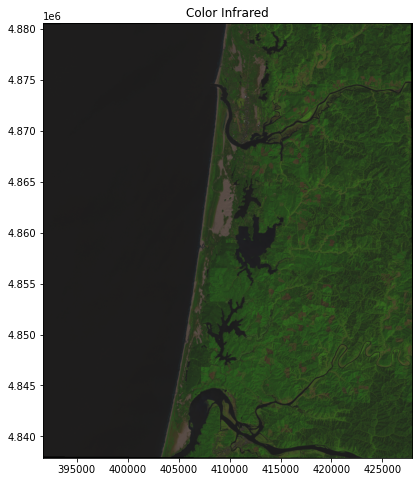

In [98]:
# Plot as RGB image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(infrared, extent=full_extent)
ax.set_title("Color Infrared")
plt.show()

### Question 4 (for grad students/extra credit)


#### a) Produce an NDWI histogram for the Landsat image of Florence


In [99]:
# Compute NDWI
np.seterr(divide='ignore', invalid='ignore')
ndwi = np.divide((all_bands[:,:,2].astype(float) - all_bands[:,:,4].astype(float)), \
                 (all_bands[:,:,2].astype(float) + all_bands[:,:,4].astype(float)))

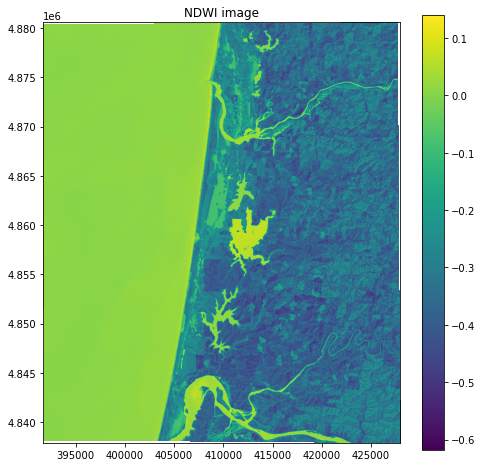

In [100]:
# Plot NDWI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndwi, extent=full_extent)
ax.set_title("NDWI image")
fig.colorbar(im, orientation='vertical')
plt.show()

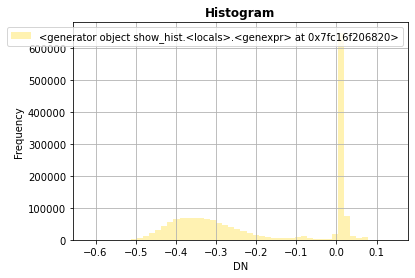

In [101]:
from rasterio.plot import show_hist
show_hist(
     ndwi, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

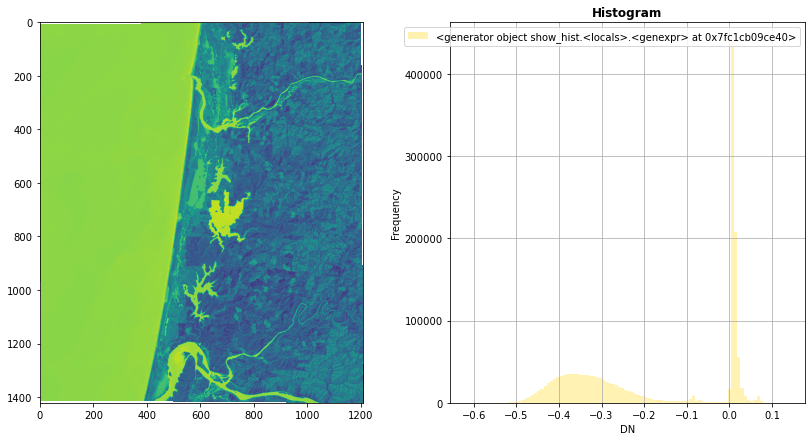

In [103]:
from rasterio.plot import show
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show(ndwi, ax=axrgb)

show_hist(ndwi, bins=100, histtype='stepfilled',
           lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()

#### b) Choose a threshold and produce a binary water mask


more changes test
